# Week 6 Assignment - Machine Learning

**Brian Roepke**  
**DATA 110**  
**February 14, 2021**  

EDA (exploratory data analysis). 
 
**The Iris Dataset:**
> The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.


https://en.wikipedia.org/wiki/Iris_flower_data_set

![Iris Species](iris.png)

## Data Import and Description
Load the dataset and describe the data:

 * Dimensions of the dataset
 * Peek at the data itself (eg: pandas head/tail)
 * Statistical summary of all attributes
 * Breakdown of the data by the class variable (eg: by Lily type)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, \
    classification_report, plot_confusion_matrix, confusion_matrix 
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, \
    GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn import tree
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("irisdata.csv")

### Dimensions

In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Info:** `150` total observations across `5` columns.  `4` column data types are `floating-point` numbers and one as an `object` type.

### Numerical Data

In [5]:
# get numerical data only
numeric_data = df.select_dtypes(include=['float'])

numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Numerical Data:**  
There are `4` numerical columns. `sepal-lenth`, `sepal-width`, `petal-length`, and `petal-width`.

### Categorical Data

In [6]:
# Change the ojbect type to a category type
df['species'] = df.species.astype('category')

# get categorical data
cat_data = df.select_dtypes(include=['category'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   species  150 non-null    category
dtypes: category(1)
memory usage: 410.0 bytes


**Categorical Data:**  
There is one categorical column named `species`.

In [7]:
df['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [8]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64 



**Species:** There are `3` different Species in this dataset, each having `50` observations. Iris-virginica, Iris-setosa, Iris-versicolor

### Check for Null Values

In [9]:
# check for nan/null
df.isnull().values.any()

False

In [10]:
# count of nulls
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
species         0
dtype: int64

**Note:** There are no NULL values in this dataset 

### Remove Duplicates

In [11]:
# drop duplicates
len(df.drop_duplicates())

147

In [12]:
df.shape

(150, 5)

**Note:** There were 3 duplicates in this dataset, however they will remain because they represent distinct observations/measurements of a species.  

### Show Head and Tail

In [13]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Statistical Summary of all Attributes

Including a Breakdown of the data by the class variable (eg: by Lily type)

In [15]:
df.describe().round(3)

,sepal-length,sepal-width,petal-length,petal-width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


**Observations:**
 * `Sepal-Length` has the largest `max` value at `7.9` as well as the largest `mean` at `5.843`.
 * `Petal-Width` is the smallest value in our dataset, with the `min` at `0.1` and the smallest mean at `1.199`. 
 * All `Width` values in all cases are smaller than the `Length` values.
 * `Petal-Width` also has the most variance relative to its mean at `0.763^2`.

In [16]:
#statistical summary by class variable (use round to suppress scientif notation as needed)
print("Statistics by Species")

species = df.groupby('species').describe().round(3)

# transposed index and columns for long format (easier to view) vs wide
species.transpose() 

Statistics by Species


species             Iris-setosa  Iris-versicolor  Iris-virginica
sepal-length count       50.000           50.000          50.000
             mean         5.006            5.936           6.588
             std          0.352            0.516           0.636
             min          4.300            4.900           4.900
             25%          4.800            5.600           6.225
             50%          5.000            5.900           6.500
             75%          5.200            6.300           6.900
             max          5.800            7.000           7.900
sepal-width  count       50.000           50.000          50.000
             mean         3.418            2.770           2.974
             std          0.381            0.314           0.322
             min          2.300            2.000           2.200
             25%          3.125            2.525           2.800
             50%          3.400            2.800           3.000
             75%          3.675            3.000           3.175
             max          4.400            3.400           3.800
petal-length count       50.000           50.000          50.000
             mean         1.464            4.260           5.552
             std          0.174            0.470           0.552
             min          1.000            3.000           4.500
             25%          1.400            4.000           5.100
             50%          1.500            4.350           5.550
             75%          1.575            4.600           5.875
             max          1.900            5.100           6.900
petal-width  count       50.000           50.000          50.000
             mean         0.244            1.326           2.026
             std          0.107            0.198           0.275
             min          0.100            1.000           1.400
             25%          0.200            1.200           1.800
             50%          0.200            1.300           2.000
             75%          0.300            1.500           2.300
             max          0.600            1.800           2.500

**Observations:**
 * There are `50` observations for each species.
 * `Iris-Virginica` appears to be the largest regarding both `Petal-Length` and `Sepal-Length` for `mean` and `max` values.
 * `Iris-Setosa` is the smallest overall in both `Petal-Length` and `Sepal-Length.`  It's also the smallest overall for `Petal-Width.`
 * `Iris-Versicolor` appears to be sized between the other two species except for its `Sepal-Width,` which is the smallest overall for both `min` and `max` values.
 
**Note:** These differences will be easier to see in visualizations.

# Data Visualization
Visualize the data: Univariate refers to a single variable while Multivariate refers to multiple variables.
 * Univariate plots - sepal-length, sepal-width, petal-length, petal-width
 * Histograms
 * Multivariate plots

## Univariate Plots

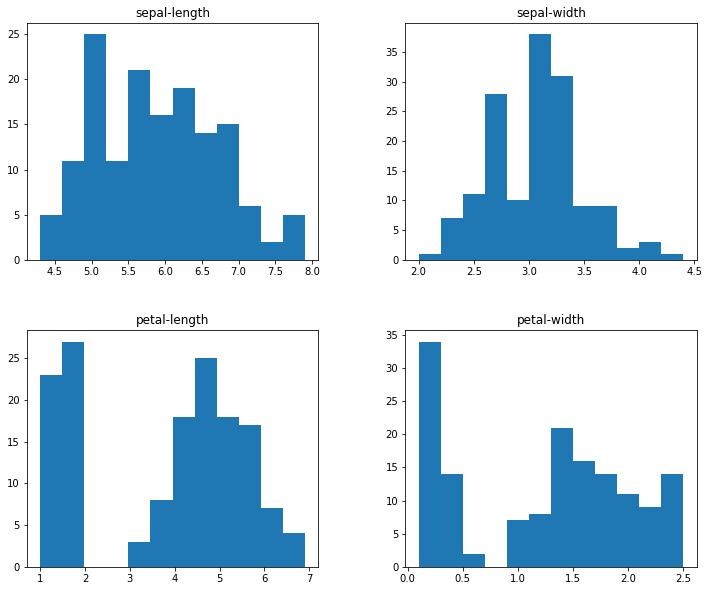

In [17]:
df.hist(figsize=(12,10), grid=False, bins=12, sharex=False);

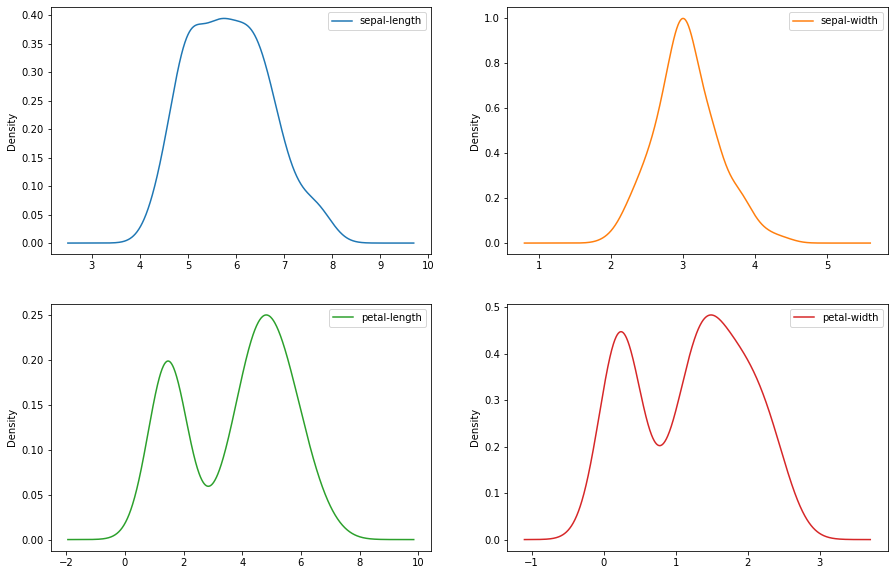

In [18]:
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(2,2), sharex=False);

**Histogram and Density plot Observations:**  
 * `Sepal-Length` and `Sepal-Width` are approximately normally distributed.  
 * `Sepal-Length` has a larger standard deviation and variance than `Sepal-Width.`
 * `Petal-Length` and `Sepal-Length` both show a bimodal shape, with two peaks.

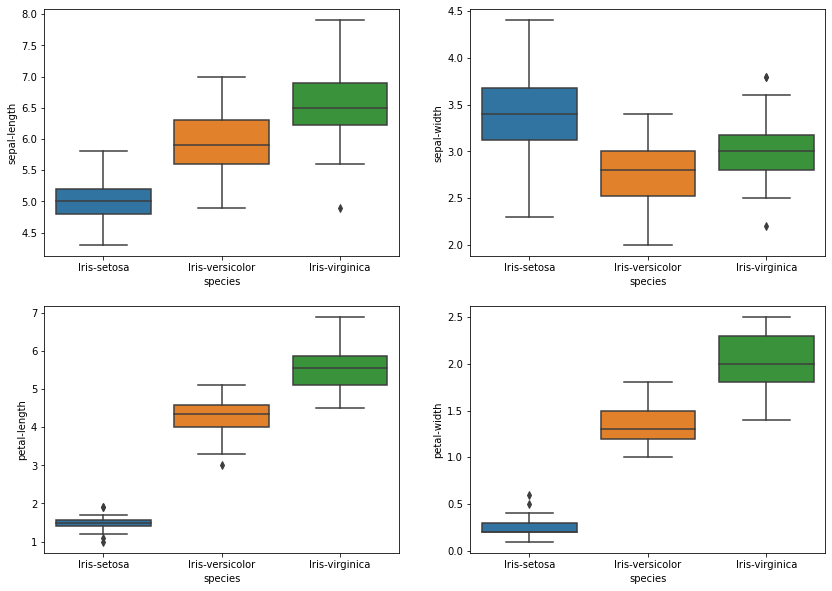

In [19]:
# using seaborn library, plot each individually
fig, axes = plt.subplots(2, 2, figsize=(14,10))

ax = sns.boxplot(x="species", y="sepal-length", data=df, ax=axes[0, 0])
ax = sns.boxplot(x="species", y="sepal-width", data=df, ax=axes[0, 1])
ax = sns.boxplot(x="species", y="petal-length", data=df, ax=axes[1, 0])
ax = sns.boxplot(x="species", y="petal-width", data=df, ax=axes[1, 1])

**Box and Whiskers Plots:**  
 - **Sepal-Length**: Each species from Setosa to Versicolor, to Virginica, get increasingly larger in Sepal Length on all dimensions of `Min,` `Max` and `Median.`  
 - **Sepal-Width**: The box plots here show a different pattern.  The Setosa species has the largest `max` and `median` of any of the species.   
 - **Petal-Length**: Similar to Sepal length, each species from Setosa, to Versicolor to Virginica get increasingly larger in Peta Length on all dimension of `Min,` `Max` and `Median.` There also is a much smaller `inner-quartile` range for the Setosa species relative to the others, showing that there isn't a lot of variance in the sizes.   
 - **Petal-Width**: Petal width also increases with each species, but we can see a much smaller `inner-quartile` percentage and min and max for the Setosa species.  

## Multivariate Plots

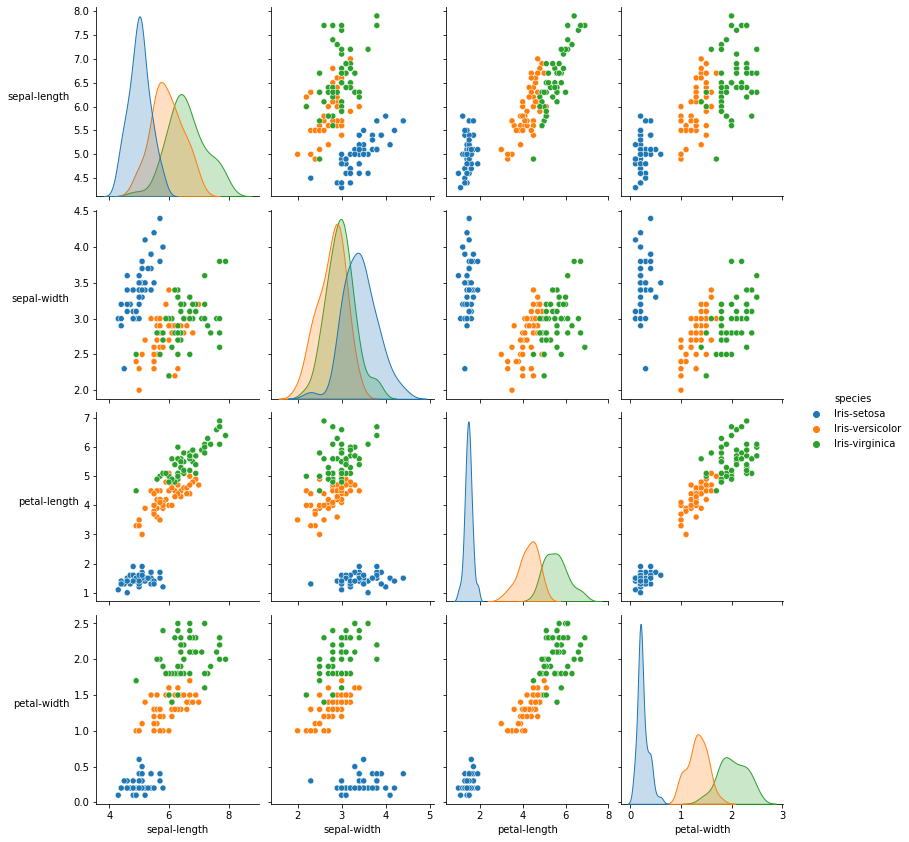

In [20]:
# Using seaborn, pairwise plot by income

g=sns.pairplot(df, diag_kind = 'auto', hue='species')
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

**Observations**
 - **Density Plots**: Across the diagonals, we have density plots overlaid on each other by species. We can see that the setosa is the smallest (furthest left), and virginica is the largest for all but sepal-width.  With sepal-width that changes and setosa are the largest.  
 - **Distinct Groupings**: In all other scatterplots, there appear to be two distinct, separable groupings.   The grouping is shown in blue as the Setosa species and the mixed grouping of Versicolor and Virginia.  Since the data is labeled with species, it's possible to see the differences between those latter two species. However, it would not be discernible without that labeling. 
 - **Highly Correlated Variables**: There appears to be a strong linear relationship between variables in some cases. The strongest appears to be `petal-lenght` vs. `petal-width.`  The relationship between `petal-length` and `sepal-lenght` also appears to be slightly correlated, but not as strongly. 
 
**Next**: Calculate the actual correlations between variables. 

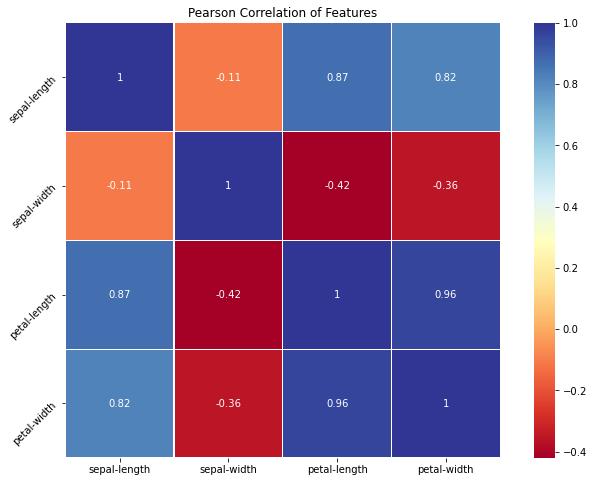

In [21]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="RdYlBu", annot=True, square=True, ax=ax,  linewidth = 0.1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

**Correlation Observations:**
 - `Petal-Length` & `Petal-Width` have the strongest correlation at `0.96`
 - `Petal-Length` & `Sepal-Length` has the next strongest correlation `at 0.87` - This relationship was observed above and validated here.
 - There are slight negative correlations between `Sepal-Width` and `Petal-Length`, but it's not as strong with a value of `-0.42`

# Machine Learning

## Cross Validation

In the subsequent processes of building our algorithms, we will use the "Train-Test Split" methodology.  The process takes a dataset and splits it *randomly* into two different portions.  The model will use on of the two proportions to **train** the algorithm, and the other will be used to **test** it.  To ensure the proper performance of our model, we'll use cross-validation.

Cross-validation in machine learning is the process of utilizing several slices of a dataset to ensure that a model built off of a train-test split is not overfit, underfit, or contains sampling bias.  The process consists of partitioning the dataset into a specified number, performing the model calculations, and comparing the results. 

Further reading for [Cross Validation on Wikipedia](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) And [Cross Validation from Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

### k-Folds Cross Validation - Linear Model

The first model to validate is our Linear Regression model from sklearn. This will be performed across three independent variables, and a dependent variable `petal-width`, or the value we will try to predict.  Using k-Folds cross validation with 10 splits, we can test the models performance without worrying about bias in the data.

In [22]:
X = np.array(df.drop(columns=['petal-width', 'species']))
y = np.array(df['petal-width'])

In [23]:
# prepare the cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# visualize the folds
#for train_index, test_index in kf.split(X, y):
#    print("TRAIN:", train_index, "\nTEST:", test_index)

In [24]:
model = LinearRegression() # create model

# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=kf, n_jobs=-1)
print (scores, '\n')

# report performance
q = round(np.mean(scores), 3)
p = round(np.std(scores), 3)
print(f"R^2:  mean = {q} , std = {p}")
print(f"Approx scores between: {q-p} and {round(q+p,3)}")

[0.90582286 0.89509041 0.91677601 0.93249679 0.95032382 0.97458802
 0.90872901 0.960447   0.96448821 0.84792806] 

R^2:  mean = 0.926 , std = 0.037
Approx scores between: 0.889 and 0.963


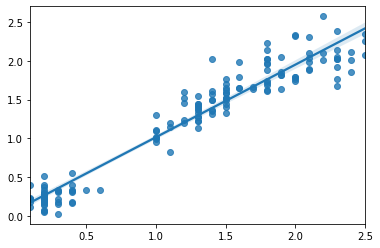

In [25]:
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=kf)
ax = sns.regplot(x=y, y=predictions);

**Note:** Plotting the values of the training `y` values on the x-axis and the `predicted-y` on the y-axis displays the error in predictions.  a perfect predicted value would fall on the regression line.

In [26]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9343091621503449


**Note:** The first model, `LinearRegression` with 10-Fold cross-validation, concluded with a mean $R^2$ score of `0.926` with a Standard Deviation of `0.037`.  This suggests that our model should perform within these parameters after randomly splitting our dataset into Train-Test partitions.

### k-Folds Cross Validation - Logistic Model

The next model to validate is the `LogisticRegression`.  A Logistic Regression uses a categorical dependent variable and the four continuous variables in the dataset as the independent variables.

In [27]:
X = np.array(df.drop(columns=['species']))
y = np.array(df['species'])

In [28]:
# prepare the cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# visulize the folds
#for train_index, test_index in kf.split(X, y):
#    print("TRAIN:", train_index, "\nTEST:", test_index)

In [29]:
model = LogisticRegression() # create model

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
x = scores[~np.isnan(scores)]
print (x, '\n')

# report performance
q = round(np.mean(x), 3)
p = round(np.std(x), 3)
print(f"R^2:  mean = {q} , std = {p}")
print(f"Approx scores between: {q-p} and {round(q+p,3)}")

[1.         1.         1.         0.93333333] 

R^2:  mean = 0.983 , std = 0.029
Approx scores between: 0.954 and 1.012


**Note:** The logistic regression for the prediction of a categorical value performs very well.  A mean score of `0.983` was computed across 10 folds.  

### k-Folds Cross Validation - Decision Tree

The next model to validate is the `DecisionTree`.  Before starting, a numeric target column is needed for some prediction methods by creating a numerical value for each and then dropping the original column.

 * Iris-setosa = 0
 * Iris-versicolor = 1
 * Iris-virginica = 2

In [30]:
df.loc[df['species'] == "Iris-setosa", 'target'] = 0
df.loc[df['species'] == "Iris-versicolor", 'target'] = 1
df.loc[df['species'] == "Iris-virginica", 'target'] = 2

In [31]:
df.sample(5)

,sepal-length,sepal-width,petal-length,petal-width,species,target
17,5.1,3.5,1.4,0.3,Iris-setosa,0.0
27,5.2,3.5,1.5,0.2,Iris-setosa,0.0
29,4.7,3.2,1.6,0.2,Iris-setosa,0.0
46,5.1,3.8,1.6,0.2,Iris-setosa,0.0
74,6.4,2.9,4.3,1.3,Iris-versicolor,1.0


In [32]:
X = np.array(df.drop(columns=['species', 'target']))
y = np.array(df['target'])

In [33]:
# prepare the cross-validation with 10 splits
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# visulize the folds
#for train_index, test_index in kf.split(X, y):
#    print("TRAIN:", train_index, "\nTEST:", test_index)

In [34]:
model = DecisionTreeClassifier() # create model

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
x = scores[~np.isnan(scores)]
print (x, '\n')

# report performance
q = round(np.mean(x), 3)
p = round(np.std(x), 3)
print(f"R^2:  mean = {q} , std = {p}")
print(f"Approx scores between: {q-p} and {round(q+p,3)}")

[1.         0.93333333 0.93333333 1.         1.         0.93333333
 1.         0.86666667 0.93333333 0.93333333] 

R^2:  mean = 0.953 , std = 0.043
Approx scores between: 0.9099999999999999 and 0.996


**Note:** The `DecisionTreeClassifier` model performs well also.  We see a $R^2$ value of `0.94` and a Standard Deviation of `0.063` across all ten runs.   

## Supervised Learning

A supervised algorithm generalizes from known samples. The ML algorithm is fed data *labeled* with known good values as inputs and then uses those labels to generate an output based on a mathematical representation of some value's probability.

### Linear Model (Single)

The purpose of this first linear model is to build a prediction between the `petal-length` and `petal-width`.  As shown in the correlation matrix, these are the two most highly correlated variables and will provide a good test for learning the LinearModel.

[Linear Regression Example from Scikit-Learn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)

In [35]:
# Create two Arrays for the X and Y values in the linear model.
petal_length = np.array(df['petal-length'])
petal_width = np.array(df['petal-width'])
petal_length = petal_length.reshape(150,1)
petal_width = petal_width.reshape(150,1)

In [36]:
# Split the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(petal_length, petal_width, 
                                                    test_size=0.33, random_state=42)

In [37]:
print("Training Size:",len(X_train))
print("Test Size:",len(X_test))

Training Size: 100
Test Size: 50


In [38]:
regr = LinearRegression()
regr.fit(X_train, y_train);

In [39]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

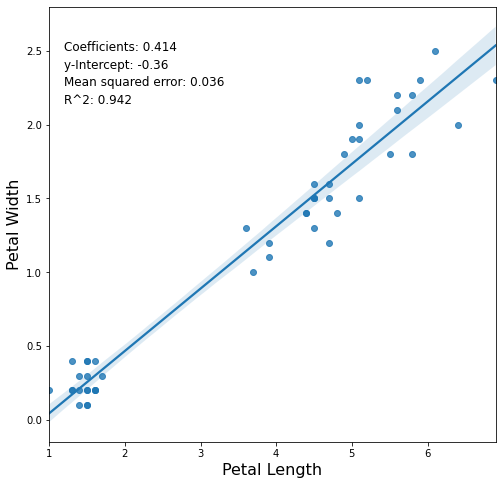

In [40]:
# The coefficients
c1 = round(regr.coef_[0][0], 3)
y1 = round(regr.intercept_[0] ,3)
mse1 = round(mean_squared_error(y_test, y_pred) ,3)
r21 = round(r2_score(y_test, y_pred) ,3)

# Plot outputs
plt.figure(figsize=(8,8))
ax = sns.regplot(x=X_test, y=y_test)

plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16);

plt.text(1.2, 2.5, f'Coefficients: {c1}', horizontalalignment='left', size='large', color='black')
plt.text(1.2, 2.38, f'y-Intercept: {y1}', horizontalalignment='left', size='large', color='black')
plt.text(1.2, 2.26, f'Mean squared error: {mse1}', horizontalalignment='left', size='large', color='black')
plt.text(1.2, 2.14, f'R^2: {r21}', horizontalalignment='left', size='large', color='black')

plt.show();

The linear model after running it on a train-test split produced a $R^2$ value of `0.942`.  This value is slightly lower than the `0.96` shown in the correlation matrix but similar.

The MSE of this model is `0.036`, a very low error.

**Next:** Showing the predictor of the value in action. Taking an observation from the database, the measurments of `5` for `petal-legnth` results in a `petal-width` of `1.7`.  Our predictor computed a value of `1.707`.

The objective of this predictor for the model, would be to take new observations that weren't previously seen and produce a predicted `petal-width`.

In [41]:
# Try predicting a value.  5 should be 1.7
p = np.array([[5,]])
regr.predict(p)

array([[1.7071735]])

### Multiple Linear Model

After proving out the simple liner model, we will perform a **Multiple Linear Regression** with the first three variables in the dataset `sepal-length`, `sepal-width`, and `petal-length` to predict the response variable `petal-width`.

In [42]:
multiple_X = np.array(df.drop(columns=['target', 'petal-width', 'species']))
multiple_target = np.array(df['petal-width'])
print(multiple_X.shape)
print(multiple_target.shape)

(150, 3)
(150,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(multiple_X, multiple_target, test_size=0.33)

print (X_train.shape, y_train.shape, '\n', 
       X_test.shape, y_test.shape)

(100, 3) (100,) 
 (50, 3) (50,)


In [44]:
regr = LinearRegression()  #linear regression model
regr.fit(X_train, y_train) #fit/train the model to the training data

# make predictions on unseen test. data
y_pred = regr.predict(X_test)

# view the first 5 predictions
y_pred[0:5]

array([2.56179394, 1.65292289, 0.34210336, 1.78796296, 1.68852316])

Because this is a Multiple Linear Regression, we need to calculate the Adjusted $R^2$ value.

$$\bar{R}^{2}=1-\left(1-R^{2}\right) \frac{n-1}{n-p-1}$$

In [45]:
r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))
adj_r2

0.9391562557674533

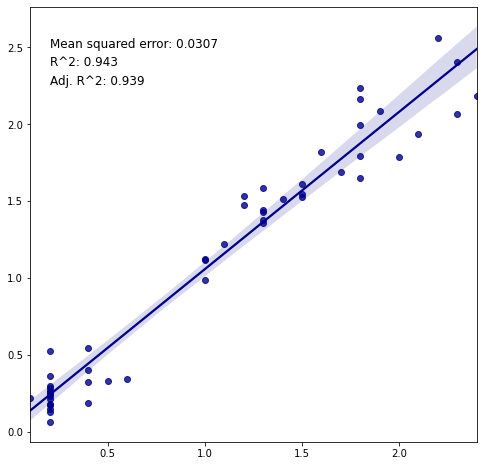

In [46]:
# The coefficients
mse1 = round(mean_squared_error(y_test, y_pred) ,4)
r21 = round(r2_score(y_test, y_pred) ,3)
adj_r2 = round(adj_r2, 3)

plt.figure(figsize=(8,8))
sns.regplot(x=y_test, y=y_pred, color='darkblue')

plt.text(.2, 2.5, f'Mean squared error: {mse1}', horizontalalignment='left', size='large', color='black')
plt.text(.2, 2.38, f'R^2: {r21}', horizontalalignment='left', size='large', color='black')
plt.text(.2, 2.26, f'Adj. R^2: {adj_r2}', horizontalalignment='left', size='large', color='black')

plt.show();

**Conclusion:** The multiple linear regression model concluded with an Adjusted $R^2$ value of `0.939` and MSE of `0.0322`.  Worse than the single linear model prior with a $R^2$ value of `0.942`

**Therefore**: The simple Linear Model above should be used based on the law of parsimony, or the simplest model should be chosen.

### Logistic Regression
New we will predict a categorical value with a Logistic regression.

In [47]:
log_X = np.array(df.drop(columns=['target', 'species']))
log_target = np.array(df['species'])
print(multiple_X.shape)
print(multiple_target.shape)

(150, 3)
(150,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(log_X, log_target, test_size=0.33)

print (X_train.shape, y_train.shape, '\n', 
       X_test.shape, y_test.shape)

(100, 4) (100,) 
 (50, 4) (50,)


In [49]:
ohe = OneHotEncoder(handle_unknown = 'ignore')
ohe.fit(X_train)

X_train_enc = ohe.transform(X_train).toarray()
X_test_enc = ohe.transform(X_test).toarray()

print('Train: original:', X_train.shape)
print('Train: one-hot-encoded:', X_train_enc.shape)

print('Test: original:', X_test.shape)
print('Test: one-hot-encoded:', X_test_enc.shape)

Train: original: (100, 4)
Train: one-hot-encoded: (100, 115)
Test: original: (50, 4)
Test: one-hot-encoded: (50, 115)


In [50]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train)

# evaluate the model
y_predict = model.predict(X_test_enc)

# create a dataframe for comparison of actual vs predicted
results = pd.DataFrame({'Class':y_test, 'prediction':y_predict})
results.head(10)

,Class,prediction
0,Iris-virginica,Iris-virginica
1,Iris-virginica,Iris-virginica
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-versicolor,Iris-versicolor
5,Iris-virginica,Iris-virginica
6,Iris-versicolor,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-versicolor,Iris-versicolor


                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        14
Iris-versicolor      0.929     0.812     0.867        16
 Iris-virginica      0.864     0.950     0.905        20

       accuracy                          0.920        50
      macro avg      0.931     0.921     0.924        50
   weighted avg      0.923     0.920     0.919        50



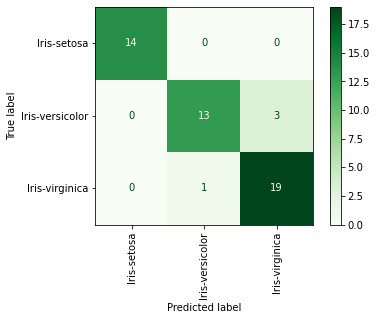

In [51]:
# print accuracy report
print(classification_report(y_test, y_predict, digits=3))

# show confusion matrix
plot_confusion_matrix(model, X_test_enc, y_test,
                      xticks_rotation='vertical',
                      cmap=plt.cm.Greens)  
plt.show()

**Observations:**
This model performs really well. We see that there are only 4 of the observations which are not properly classified.  Three where the true lable is `iris-viginica` were classified as `iris-versicolor` and one `iris-setosa` is classified as `iris-virginica`. 

### Decision Trees

In [52]:
dt_X = np.array(df.drop(columns=['species', 'target']))
dt_target = np.array(df['target'])
print(dt_X.shape)
print(dt_target.shape)

(150, 4)
(150,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(dt_X, dt_target, test_size=0.33)

print (X_train.shape, y_train.shape, '\n', 
       X_test.shape, y_test.shape)

(100, 4) (100,) 
 (50, 4) (50,)


In [54]:
# lists to collect scores
train_scores, test_scores = list(), list()

# list to define the tree depths to evaluate
values = [i for i in range(1, 10)]

# evaluate a decision tree for each depth
for i in values:
    model = DecisionTreeClassifier(max_depth=i) # decision tree model
    
    model.fit(X_train, y_train)  # fit/train
    
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print(f'{i} train: {round(train_acc, 3)} test: { round(test_acc, 3)}')

1 train: 0.71 test: 0.58
2 train: 0.99 test: 0.88
3 train: 0.99 test: 0.88
4 train: 1.0 test: 0.92
5 train: 1.0 test: 0.92
6 train: 1.0 test: 0.92
7 train: 1.0 test: 0.88
8 train: 1.0 test: 0.9
9 train: 1.0 test: 0.88


**Note:** The scores end on stop improving at about the 5th iteration, with one slightly better at the 7th.

Next, plot all model accuracy scores on the `train` and `test` datasets to visualize this. The plot shows that it starts to quickly converge even at the second level and then stops improving from there. We can check for the reccomended number of tree-levels next utiliting the `GridSearchCV` function from Scikit-Learn.

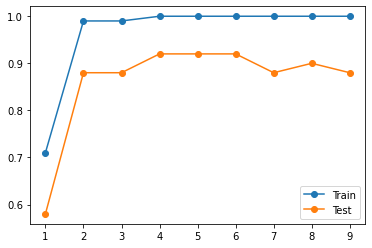

In [55]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [56]:
feature_cols = ['sepal-length','sepal-width', 'petal-length', 'petal-width']
class_name = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

In [57]:
def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_

dtree_grid_search(X_train, y_train, 5)

{'criterion': 'gini', 'max_depth': 3}

In [58]:
# classifier
dt_clf = DecisionTreeClassifier(random_state=0, max_depth=3)

# train
dt_clf.fit(X_train, y_train)

# make predictions
y_predictions = dt_clf.predict(X_test)

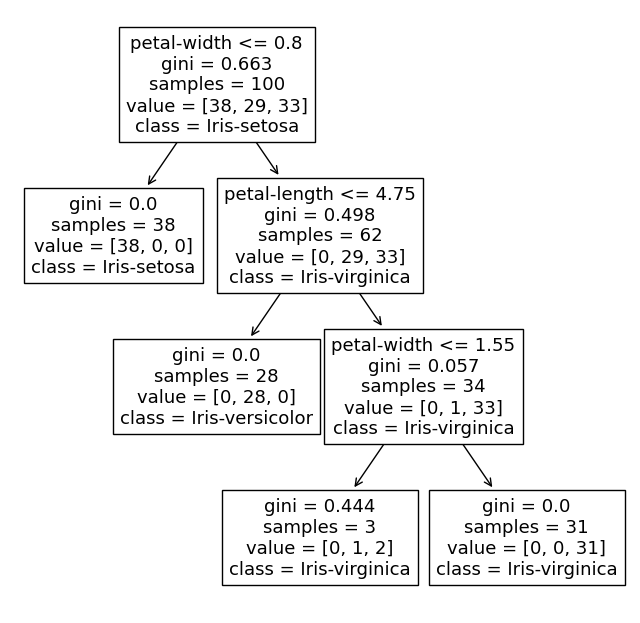

In [59]:
plt.figure(figsize = (8,8), dpi=100)
tree.plot_tree(dt_clf, feature_names = feature_cols, class_names=class_name,filled=False)
plt.show()

**Note:** *Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.* 

https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8

In [60]:
# determine most important features
imp_df = df.drop(columns=['target', 'species'])
importances = pd.DataFrame({'feature':imp_df.columns,'importance':np.round(dt_clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
3,petal-width,0.554
2,petal-length,0.446
0,sepal-length,0.000
1,sepal-width,0.000


              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        12
         1.0      0.941     0.762     0.842        21
         2.0      0.762     0.941     0.842        17

    accuracy                          0.880        50
   macro avg      0.901     0.901     0.895        50
weighted avg      0.894     0.880     0.880        50



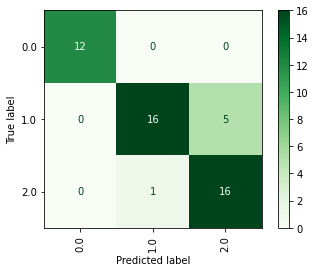

In [61]:
# print accuracy report
print(classification_report(y_test, y_predictions, digits=3))


# show confusion matrix
plot_confusion_matrix(dt_clf, X_test, y_test,
                      xticks_rotation='vertical',
                      cmap=plt.cm.Greens)  
plt.show()   

**Observations:**
Similar to the `LogisticRegression`, this model performs well. We see that only 4 of the observations are not properly classified, the same as the Logistic model.  However, all four were misclassified in the same category, the true label of `1.0`.

## Unsupervised Learning

With unsupervised learning, we do not have a pre-labled set of data that we're testing our results against.  In order to simulate this, we can drop the species and or target columns used prior.  This way we will only be working with the four continuous variables.

### Determine the Optimal Number of Clusters

To select the best number of clusters, we'll use the Elbow method.  Per [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

> In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

[Tutorial: How to determine the optimal number of clusters for k-means clustering](https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f)

**Note:** The dataset generally does not have a lot of `variance` or large `max`, small `min` values.  However, it's a good practice to scale the data to have all values fall within 0-1.

In [62]:
elbow = np.array(df.drop(columns=['target', 'species']))
# Show five rows of the original data
elbow[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [63]:
mms = MinMaxScaler()
mms.fit(elbow)
elbow = mms.transform(elbow)
# Show five rows of the rescaled data
elbow[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [64]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(elbow)
    Sum_of_squared_distances.append(km.inertia_)

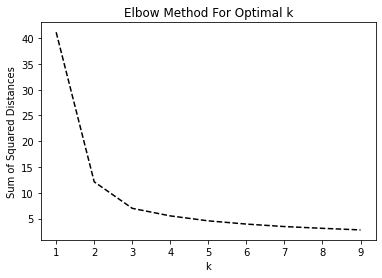

In [65]:
plt.plot(K, Sum_of_squared_distances, '--k')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Conclusion:** Based on this method, the appropriate number of clusters is `3`. The elbow is observed by the line's flattening representing the sum of square distances between cluster centers. 

Of course, this is something we already knew from the dataset since it was labeled with species. However, this nicely demonstrates this method.

### k-Means
The first Unsupervised ML task we'll perform is a clustering across two of highest correlated variables, `petal-length` and `petal-width`.  This exercise will demonstrate pretty cleanly how k-Mean finds the optimal cluster centers based on the data.

[Predicting Iris Flower Species With K-Means Clustering In Python](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)

#### Plot the Original Clusters

In [66]:
petal = np.array(df.loc[:,['petal-length', 'petal-width']])

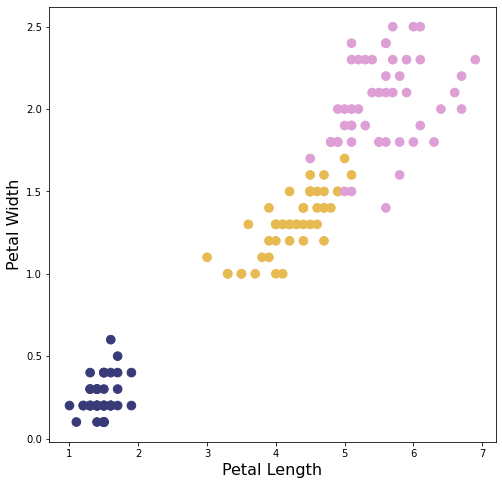

In [67]:
plt.figure(figsize=(8,8))
plt.scatter(df['petal-length'], df['petal-width'], c=df['target'], cmap="tab20b", s=75)
plt.xlabel('Petal Length', fontsize=16)
plt.ylabel('Petal Width', fontsize=16);

**Observations:** We can see the three different `species` shown by their clustering.  The first one is well separated from the others, but the final two clusters are slightly overlapping. This suggests that since we do not have separable data, we will not reproduce the manually labeled clusters, but we can come close.

In [68]:
km = KMeans(n_clusters = 3, random_state=21)
km.fit(petal)

KMeans(n_clusters=3, random_state=21)

#### Plot the Actual vs. Predicted

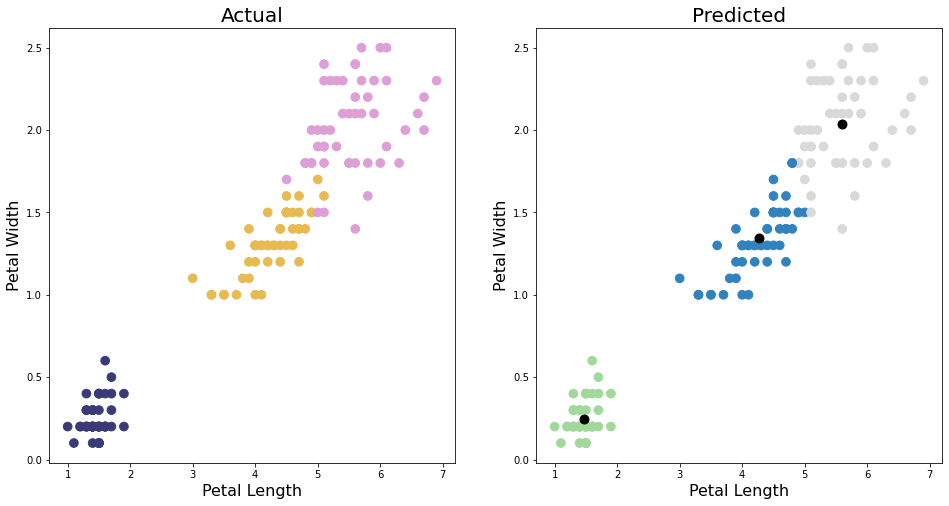

In [69]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
centroids = km.cluster_centers_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(df['petal-length'], df['petal-width'], c=df['target'], cmap='tab20b', s=75)
axes[1].scatter(petal[:, 0], petal[:, 1], c=new_labels, cmap='tab20c', s=75)
axes[1].scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

axes[0].set_xlabel('Petal Length', fontsize=16)
axes[0].set_ylabel('Petal Width', fontsize=16)
axes[1].set_xlabel('Petal Length', fontsize=16)
axes[1].set_ylabel('Petal Width', fontsize=16)
axes[0].set_title('Actual', fontsize=20)
axes[1].set_title('Predicted', fontsize=20);

**Observations:** By plotting the original labels for the `species` next to our predicted clusters, we can see that, for the most part, the algorithm did a good job at selecting the appropriate species based on `petal-length` and `petal-width` only.  We can also see in the black dots on the Predicted scatterplot, the cluster centers calculated.

Next, we can see how many were not actually classified correctly.  We'll use a simple method showing counts by cluster.  We know the original dataset had 50-50-50 even distribution.  Here 2 of the observations were not classified correctly.  That's `98.6%` accuracy.

**Note:** It's important to mention that this accuracy is not an actual metric, it's only for demonstration purposes.  In a true unsupervised situation we would not have labeled data, and therefore nothing to compare the outcome to.  A subject matter expert would have to interpret the clusters for meaning and decide if they made sense.

In [70]:
unique, counts = np.unique(new_labels, return_counts=True)
dict(zip(unique, counts))

{0: 52, 1: 50, 2: 48}

### k-Means on All Features

Perform the same clustering on the Iris dataset, but this time use all 4 features as input variables.  See if things are any better this time.

In [71]:
cluster = np.array(df.drop(columns=['target', 'species']))

In [72]:
km = KMeans(n_clusters = 3, random_state=999)
km.fit(cluster)

KMeans(n_clusters=3, random_state=999)

In [73]:
k_target = df['target']
k_pred = km.labels_
cluster = pd.DataFrame(cluster)
cluster['target'] = km.labels_

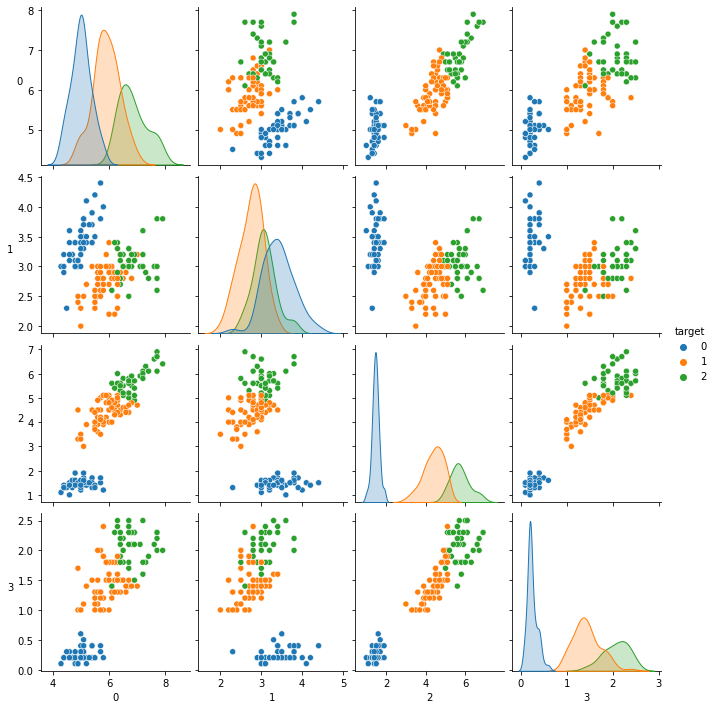

In [74]:
# Using seaborn, pairwise plot by income

g=sns.pairplot(cluster, diag_kind = 'auto', hue='target', palette='tab10')
g.fig.set_size_inches(10,10);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

In [75]:
unique, counts = np.unique(km.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 62, 2: 38}

**Conclusion for k-Means on Multiple Variables:** Based on the counts of observations by predicted species (`target`), we can see that the first cluster, `0`, shows a perfect 50 observations.  This is the blue cluster plotted above that has, across all variables, perfect linear separation.  The other two clusters, `1` and `2`, have overlap across various properties reducing the overall accuracy of the predicted clusters.  in this case, `12` variables were placed in the wrong cluster dropped the computed accuracy of this to `92%`.

**Note:** It's important to mention that this accuracy is not an actual metric, it's only for demonstration purposes.  In a true unsupervised situation we would not have labeled data, and therefore nothing to compare the outcome to.  A subject matter expert would have to interpret the clusters for meaning and decide if they made sense.